In [1]:
using DifferentialEquations

In [2]:
f(u,p,t) = 0.98u
u0 = 1.0
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: 1.0

In [3]:
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 5-element Array{Float64,1}:
 0.0
 0.10042494449239292
 0.35218603951893646
 0.6934436028208104
 1.0
u: 5-element Array{Float64,1}:
 1.0
 1.1034222047865465
 1.4121908848175448
 1.9730384275622996
 2.664456142481451

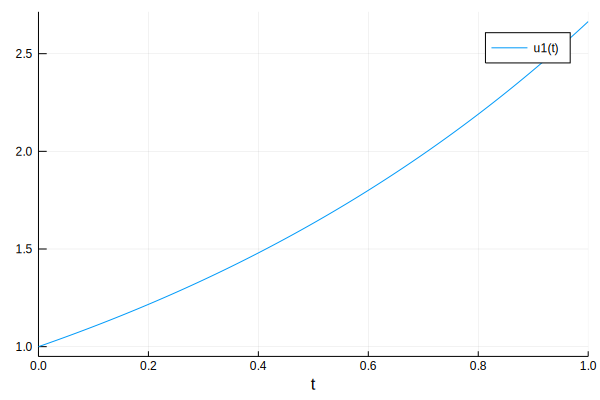

In [4]:
using Plots; gr()
plot(sol)

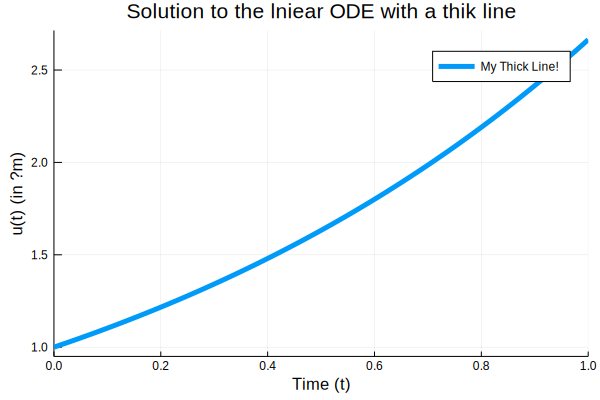

In [5]:
plot(sol,linewidth=5,title="Solution to the lniear ODE with a thik line",xaxis="Time (t)",yaxis="u(t) (in μm)",label="My Thick Line!")

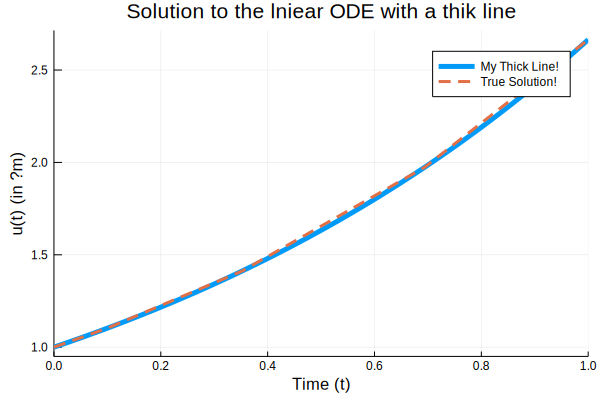

In [6]:
plot!(sol.t,t->1.0*exp(0.98t),lw=3,ls=:dash,label="True Solution!")

In [7]:
sol(0.35)

1.4091687598032554